# Exercise 4 - Coding of Satellite Signals {-}

When using satellite navigation systems based on pseudorange measurments, the transmitted signal has to be marked with a time reference so that the receiver is capable of measuring the time of arrival in the time reference system used by the satellites. The signal modulation must contain certain characteristics making it possible to separate the different satellites from each other with regard to the signals. The signals should also, to some extent, be robust against interference both intentional (jamming) and unintentional. A technique fulfilling these needs is known as spread spectrum.

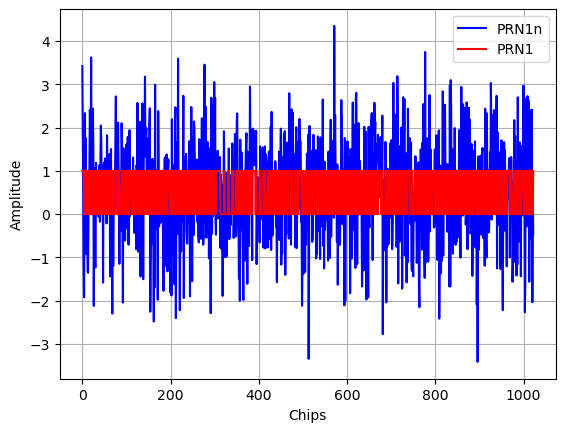

In [1]:
from numpy import array, concatenate, empty, arange, random, correlate
import matplotlib.pyplot as plt

# Generate maximum length sequence
def PRNcode(code):
    n = len(code)
    PRN = empty(2**n - 1, int)
    
    for i in range(0, 2**n - 1):
        res = code[n - 2]^code[n - 1] # Bitwise XOR
        code = concatenate(([res], code[0:n - 1])) # Insert result bit form the left and shift remaining code one bit to the right
        PRN[i] = code[n - 1]
        
    return PRN

# Shift registers (10 bit)
seed1 = array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1])
seed2 = array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1])

# Generate PRN codes
PRN1 = PRNcode(seed1)
PRN2 = PRNcode(seed2)

# Generate noise vectors
n1 = random.normal(0, 1, len(PRN1))
n2 = random.normal(0, 1, len(PRN2))

# Generate signal + noise
PRN1n = PRN1 + n1
PRN2n = PRN2 + n2

# Plot PRN codes
x = arange(0, len(PRN1))

plt.plot(x, PRN1n, 'b', label = "PRN1n")
plt.plot(x, PRN1, 'r', label = "PRN1")
plt.xlabel("Chips")
plt.ylabel("Amplitude")
plt.legend(loc = "upper right")
plt.grid()
plt.show()

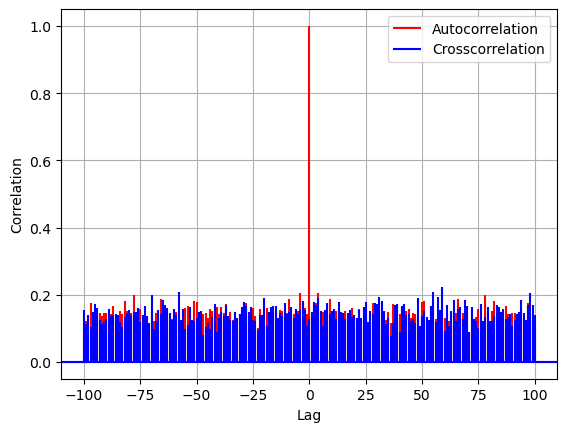

In [8]:
ax = plt.subplot(1, 1, 1)
ax.acorr(PRN1n, usevlines=True, normed=True, maxlags=100, color='r', label='Autocorrelation')
ax.xcorr(PRN1n, PRN2n, usevlines=True, normed=True, maxlags=100, color='b', label='Crosscorrelation')
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')
ax.legend()
ax.grid()
plt.show()

GNSS relies on spread spectrum signaling to achieve some remarkable capabilities. In general, spread spectrum signals occupy a large amount of RF spectrum relative to a traditionally RF system. To send 50bit/s of data, most systems would require bandwidths between 10-250Hz. In contrast the GPS navigation data are sent at 50bit/s, but occupies over 2MHz of bandwidth.

This results from the introduction of carefully designed codes onto the satellite signal. These codes, also known as sequences, are chosen for their special auto- and crosscorrelation properties. These properties allow simultaneous use of the same transmission frequencies by all satellites (CDMA), they enables precise ranging and facilitates the rejection of signal reflections together with the rejection of unwanted signals from other radio sources, so called Radio Frequency Interference (RFI).